In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
math = pd.read_csv('student_math.csv')
por = pd.read_csv('student_por.csv')
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
len(math), len(por)

(395, 649)

In [4]:
math.rename(columns={'G1': 'G1_Mat', 'G2': 'G2_Mat',
            'G3': 'G3_Mat'}, inplace=True)
por.rename(columns={'G1': 'G1_Por', 'G2': 'G2_Por',
           'G3': 'G3_Por'}, inplace=True)

In [5]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat'],
      dtype='object')

In [6]:
both = pd.merge(math, por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences'])
both = both.drop_duplicates()

In [7]:
len(both)

85

In [8]:
por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_Por        0
G2_Por        0
G3_Por        0
dtype: int64

In [9]:
por.school.value_counts(normalize=True)

school
GP    0.651772
MS    0.348228
Name: proportion, dtype: float64

In [10]:
print("%s%% of the students are in Gabriel Pereira school" % (100*round(por.school.value_counts(normalize=True)[0], 4)))

65.18% of the students are in Gabriel Pereira school


C:\Users\madha\AppData\Local\Temp\ipykernel_12400\2245768092.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%s%% of the students are in Gabriel Pereira school" % (100*round(por.school.value_counts(normalize=True)[0], 4)))


In [11]:
por.sex.value_counts(normalize=True)

sex
F    0.590139
M    0.409861
Name: proportion, dtype: float64

<Axes: xlabel='school', ylabel='count'>

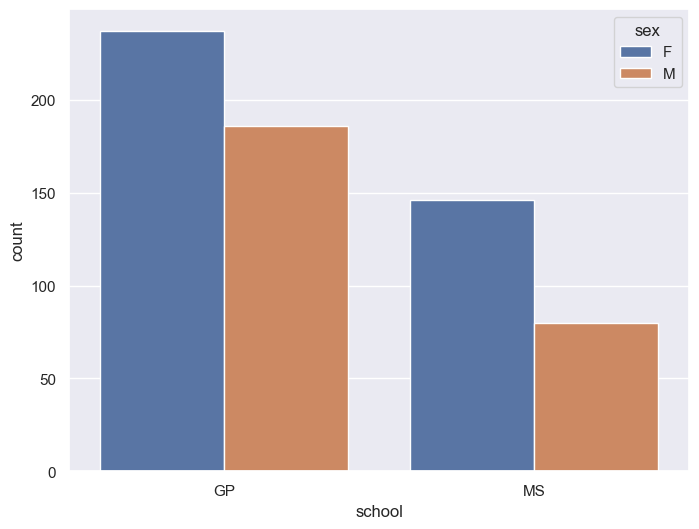

In [12]:
sns.set(rc={'figure.figsize': (8, 6)})
sns.countplot(x="school", hue="sex", data=por)

In [13]:
por.address.value_counts(normalize=True)

address
U    0.696456
R    0.303544
Name: proportion, dtype: float64

<Axes: xlabel='school', ylabel='count'>

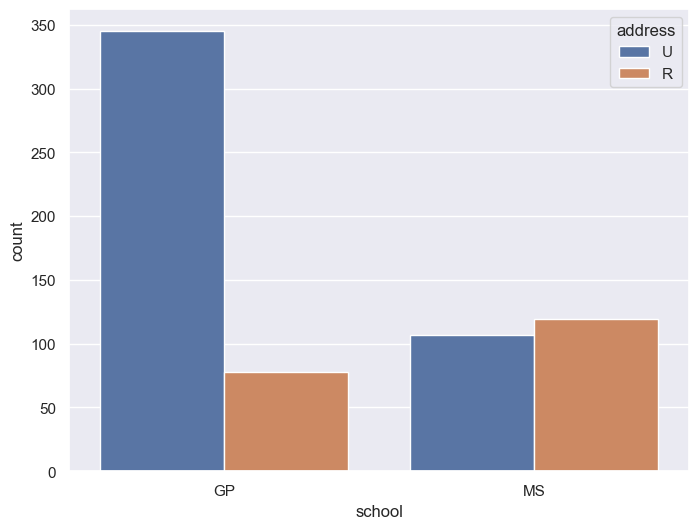

In [14]:
sns.countplot(x="school", hue="address", data=por)

In [15]:
por.Pstatus.value_counts(normalize=True)

Pstatus
T    0.876733
A    0.123267
Name: proportion, dtype: float64

<Axes: xlabel='Pstatus', ylabel='count'>

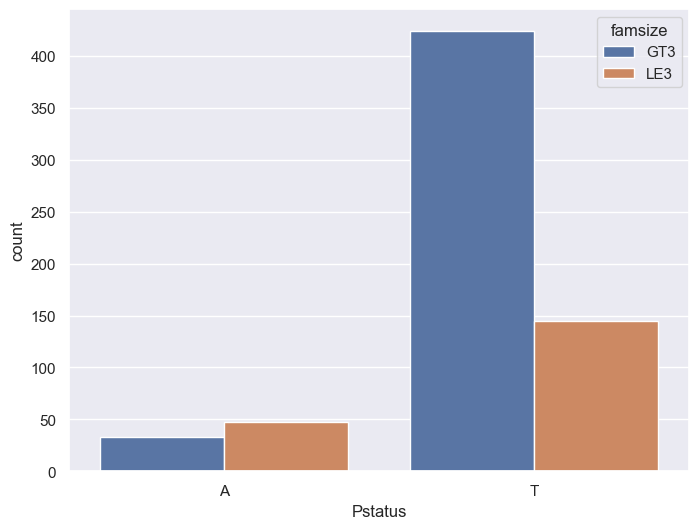

In [16]:
sns.countplot(x="Pstatus", hue="famsize", data=por)

In [17]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [18]:
por['Total_Grades'] = por['G1_Por'] + por['G2_Por'] + por['G3_Por']

C:\Users\madha\AppData\Local\Temp\ipykernel_12400\1189466151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(por.Total_Grades)


<Axes: xlabel='Total_Grades', ylabel='Density'>

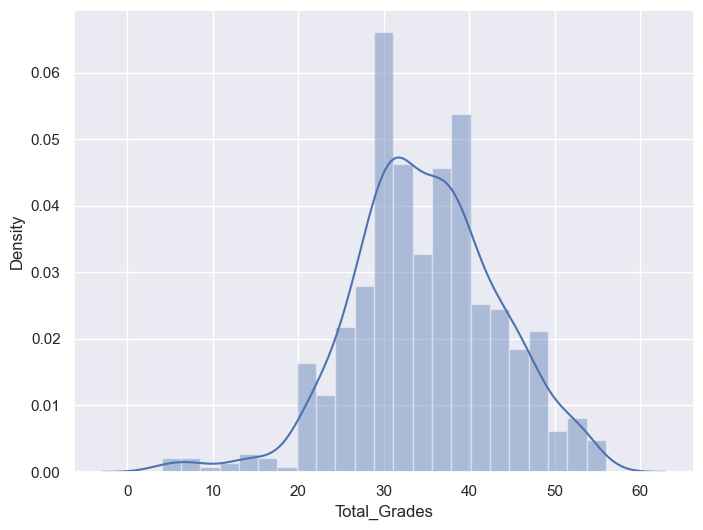

In [19]:
sns.distplot(por.Total_Grades)

C:\Users\madha\AppData\Local\Temp\ipykernel_12400\3435887947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GP.Total_Grades, hist=False, label="GP")
C:\Users\madha\AppData\Local\Temp\ipykernel_12400\3435887947.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MS.Total_Gr

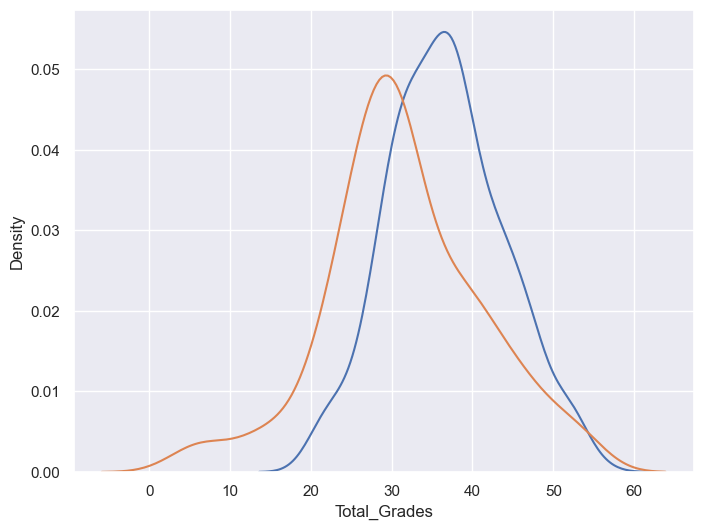

In [20]:
GP = por[por.school == 'GP']
MS = por[por.school == 'MS']

sns.distplot(GP.Total_Grades, hist=False, label="GP")
sns.distplot(MS.Total_Grades, hist=False, label="MS")
plt.show()

In [21]:
#Data cleaning

por['school'] = por['school'].map({'GP': 0, 'MS': 1}).astype(int)
por['sex'] = por['sex'].map({'M': 0, 'F': 1}).astype(int)
por['address'] = por['address'].map({'R': 0, 'U': 1}).astype(int)
por['famsize'] = por['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
por['Pstatus'] = por['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
por['Mjob'] = por['Mjob'].map(
    {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['Fjob'] = por['Fjob'].map(
    {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['reason'] = por['reason'].map(
    {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
por['guardian'] = por['guardian'].map(
    {'mother': 0, 'father': 1, 'other': 2}).astype(int)
por['schoolsup'] = por['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
por['famsup'] = por['famsup'].map({'no': 0, 'yes': 1}).astype(int)
por['paid'] = por['paid'].map({'no': 0, 'yes': 1}).astype(int)
por['activities'] = por['activities'].map({'no': 0, 'yes': 1}).astype(int)
por['nursery'] = por['nursery'].map({'no': 0, 'yes': 1}).astype(int)
por['higher'] = por['higher'].map({'no': 0, 'yes': 1}).astype(int)
por['internet'] = por['internet'].map({'no': 0, 'yes': 1}).astype(int)
por['romantic'] = por['romantic'].map({'no': 0, 'yes': 1}).astype(int)

In [22]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por,Total_Grades
0,0,1,18,1,1,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,22
1,0,1,17,1,1,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,31
2,0,1,15,1,0,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,37
3,0,1,15,1,1,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,42
4,0,1,16,1,1,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,37


In [23]:
por.corr()['Total_Grades'].sort_values(ascending=False)

Total_Grades    1.000000
G2_Por          0.971256
G3_Por          0.961829
G1_Por          0.933554
higher          0.352762
Medu            0.265905
studytime       0.261630
Fedu            0.227918
reason          0.193178
Mjob            0.167727
address         0.167455
internet        0.152914
sex             0.118333
Fjob            0.085200
activities      0.071621
famrel          0.070550
famsup          0.047932
nursery         0.034661
Pstatus         0.011045
guardian       -0.041477
famsize        -0.045694
paid           -0.052771
schoolsup      -0.067830
health         -0.082420
goout          -0.084467
romantic       -0.092213
freetime       -0.113723
absences       -0.125015
age            -0.133499
traveltime     -0.151066
Walc           -0.173906
Dalc           -0.205792
school         -0.295035
failures       -0.405815
Name: Total_Grades, dtype: float64

In [24]:
grades_corr = por.corr()['Total_Grades']

In [25]:
grades_corr = pd.DataFrame({'col': grades_corr.index, 'correlation':grades_corr.values})

In [26]:
no_corr_cols = grades_corr[(grades_corr.correlation < 0.1) & (
    grades_corr.correlation > -0.1)]
no_corr_cols = list(no_corr_cols.col)

In [27]:
# Droping grades because they are too correlated and can bias the model
X = por.drop(['G1_Por', 'G2_Por', 'G3_Por', 'Total_Grades'], axis=1)
y = por['Total_Grades']

In [28]:
# Droping columns with no correlation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
X = X.drop(no_corr_cols, axis=1)


models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor()]
names = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor']

for name, clf in zip(names, models):
    cv_model = cross_val_score(clf, X, y, cv=5).mean()
    print(name, ': %s' % cv_model)

LinearRegression : 0.18966670191119878
Ridge : 0.19042748016427086
Lasso : 0.08817650775853407
DecisionTreeRegressor : -0.7564855936377226


In [29]:
dtr = DecisionTreeRegressor()
cvs = range(2, 20)
cvs_models = []
for i in cvs:
    cvs_models.append(abs(cross_val_score(clf, X, y, cv=i).mean()))

print('Best score with', cvs_models.index(
    min(cvs_models)), 'subsets : %s' % max(cvs_models))

Best score with 10 subsets : 0.9123123275919668


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
dtr.score(X_test, y_test)

-0.3997522633244772

In [34]:
dtr.predict(X_test)

array([16., 37., 44., 16., 33., 38., 42., 27., 39., 44., 36., 34., 48.,
       40., 24., 33., 47., 28., 33., 32., 36., 32., 28., 31., 29., 28.,
       27., 35., 27., 32., 36., 31., 36., 26., 33., 43., 37., 37., 44.,
       30., 33., 45., 38., 45., 44., 33., 32., 37., 47., 28., 25., 38.,
       33., 31., 31., 41., 34., 29., 28., 36., 44., 51., 37., 44., 44.,
       50., 33., 35., 21., 28., 37., 32., 37., 39., 41., 38., 33., 30.,
       34., 32., 30., 15., 39., 30., 31., 37., 38., 44., 41., 27., 51.,
       44., 43., 30., 17., 37., 27., 39., 40., 41., 38., 26., 41., 21.,
       47., 34., 44., 43., 31., 37., 43., 50., 48., 27., 25., 47., 43.,
       33., 22., 17., 42., 49., 27., 42., 40., 24., 41., 24., 53., 30.,
       37., 26., 52., 36., 29., 20., 24., 30., 30., 30., 29., 42., 44.,
       26., 27., 15., 30., 37., 40., 41., 37., 31., 38., 31., 32., 31.,
       49., 39., 26., 39., 30., 30., 40., 35., 30., 37., 34., 32., 28.,
       31., 43., 41., 29., 31., 26., 40., 39., 39.,  5., 43., 33